In [33]:
# Importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Importing datasets
pvs1_gps_mpu_left_filepath = r"archive/PVS 4/dataset_gps_mpu_left.csv"
pvs1_gps_mpu_right_filepath = r"archive/PVS 4/dataset_gps_mpu_right.csv"

pvs1_gps_mpu_left = pd.read_csv(pvs1_gps_mpu_left_filepath)
pvs1_gps_mpu_right = pd.read_csv(pvs1_gps_mpu_left_filepath)

In [35]:
# Concatenate the left and right sensor dataframes
pvs1 = pd.concat([pvs1_gps_mpu_left, pvs1_gps_mpu_right], axis=1)

# Rename columns to distinguish between left and right sensor data
pvs1.columns = [
    'timestamp', 'acc_x_dashboard_l', 'acc_y_dashboard_l', 'acc_z_dashboard_l',
    'acc_x_above_suspension_l', 'acc_y_above_suspension_l', 'acc_z_above_suspension_l', 
    'acc_x_below_suspension_l', 'acc_y_below_suspension_l', 'acc_z_below_suspension_l', 
    'gyro_x_dashboard_l', 'gyro_y_dashboard_l', 'gyro_z_dashboard_l', 'gyro_x_above_suspension_l', 
    'gyro_y_above_suspension_l', 'gyro_z_above_suspension_l', 'gyro_x_below_suspension_l', 
    'gyro_y_below_suspension_l', 'gyro_z_below_suspension_l', 'mag_x_dashboard_l', 'mag_y_dashboard_l', 
    'mag_z_dashboard_l', 'mag_x_above_suspension_l', 'mag_y_above_suspension_l', 'mag_z_above_suspension_l', 
    'temp_dashboard_l', 'temp_above_suspension_l', 'temp_below_suspension_l', 'timestamp_gps', 
    'latitude', 'longitude', 'speed', 'timestamp', 'acc_x_dashboard_r', 'acc_y_dashboard_r', 
    'acc_z_dashboard_r', 'acc_x_above_suspension_r', 'acc_y_above_suspension_r', 
    'acc_z_above_suspension_r', 'acc_x_below_suspension_r', 'acc_y_below_suspension_r', 
    'acc_z_below_suspension_r', 'gyro_x_dashboard_r', 'gyro_y_dashboard_r', 'gyro_z_dashboard_r', 
    'gyro_x_above_suspension_r', 'gyro_y_above_suspension_r', 'gyro_z_above_suspension_r', 
    'gyro_x_below_suspension_r', 'gyro_y_below_suspension_r', 'gyro_z_below_suspension_r', 
    'mag_x_dashboard_r', 'mag_y_dashboard_r', 'mag_z_dashboard_r', 'mag_x_above_suspension_r', 
    'mag_y_above_suspension_r', 'mag_z_above_suspension_r', 'temp_dashboard_r', 'temp_above_suspension_r', 
    'temp_below_suspension_r', 'timestamp_gps', 'latitude', 'longitude', 'speed'
]

# Remove duplicate columns (those with the same name, e.g., 'timestamp_gps', 'latitude', etc.)
pvs1_removed = pvs1.loc[:, ~pvs1.columns.duplicated()]

# Check the resulting dataframe
pvs1_removed.head()

,timestamp,acc_x_dashboard_l,acc_y_dashboard_l,acc_z_dashboard_l,acc_x_above_suspension_l,acc_y_above_suspension_l,acc_z_above_suspension_l,acc_x_below_suspension_l,acc_y_below_suspension_l,acc_z_below_suspension_l,...,gyro_z_below_suspension_r,mag_x_dashboard_r,mag_y_dashboard_r,mag_z_dashboard_r,mag_x_above_suspension_r,mag_y_above_suspension_r,mag_z_above_suspension_r,temp_dashboard_r,temp_above_suspension_r,temp_below_suspension_r
0,1.577307e+09,0.571221,0.192470,9.699378,0.352532,0.226281,9.770854,0.289128,0.131624,9.917638,...,-0.186012,10.209444,-8.244299,-0.255516,36.821280,-26.555846,3.912001,36.527002,35.616467,35.808159
1,1.577307e+09,0.233639,0.771867,10.020201,0.115506,0.240646,9.894155,0.246033,0.034659,9.645896,...,-0.353859,9.379408,-10.403521,0.255516,36.383973,-26.839360,3.359417,36.383233,35.568545,36.023812
2,1.577307e+09,0.109141,0.479775,9.926827,0.383656,0.214310,9.117237,0.217302,0.193873,9.979888,...,0.271752,10.873473,-8.244299,-0.255516,33.672667,-26.555846,2.017429,36.527002,35.424776,35.999850
3,1.577307e+09,0.470665,-0.192996,9.553332,0.802642,-0.228617,9.746912,0.258004,0.122047,9.608786,...,0.119164,8.549372,-8.636885,-0.596204,33.672667,-26.555846,2.017429,36.527002,35.520622,35.856082
4,1.577307e+09,0.518549,0.252325,9.814300,0.143039,0.375919,9.793599,0.275960,-0.019211,9.600407,...,-0.430153,8.549372,-8.636885,-0.596204,36.733819,-26.839360,6.517038,36.622847,35.448738,35.904005


In [36]:
#define a correlation matrix 

#keep only numeric values 
numeric_df = pvs1_removed.select_dtypes(include=['number'])

#print(numeric_df.columns)
correlation_matrix=numeric_df.corr()

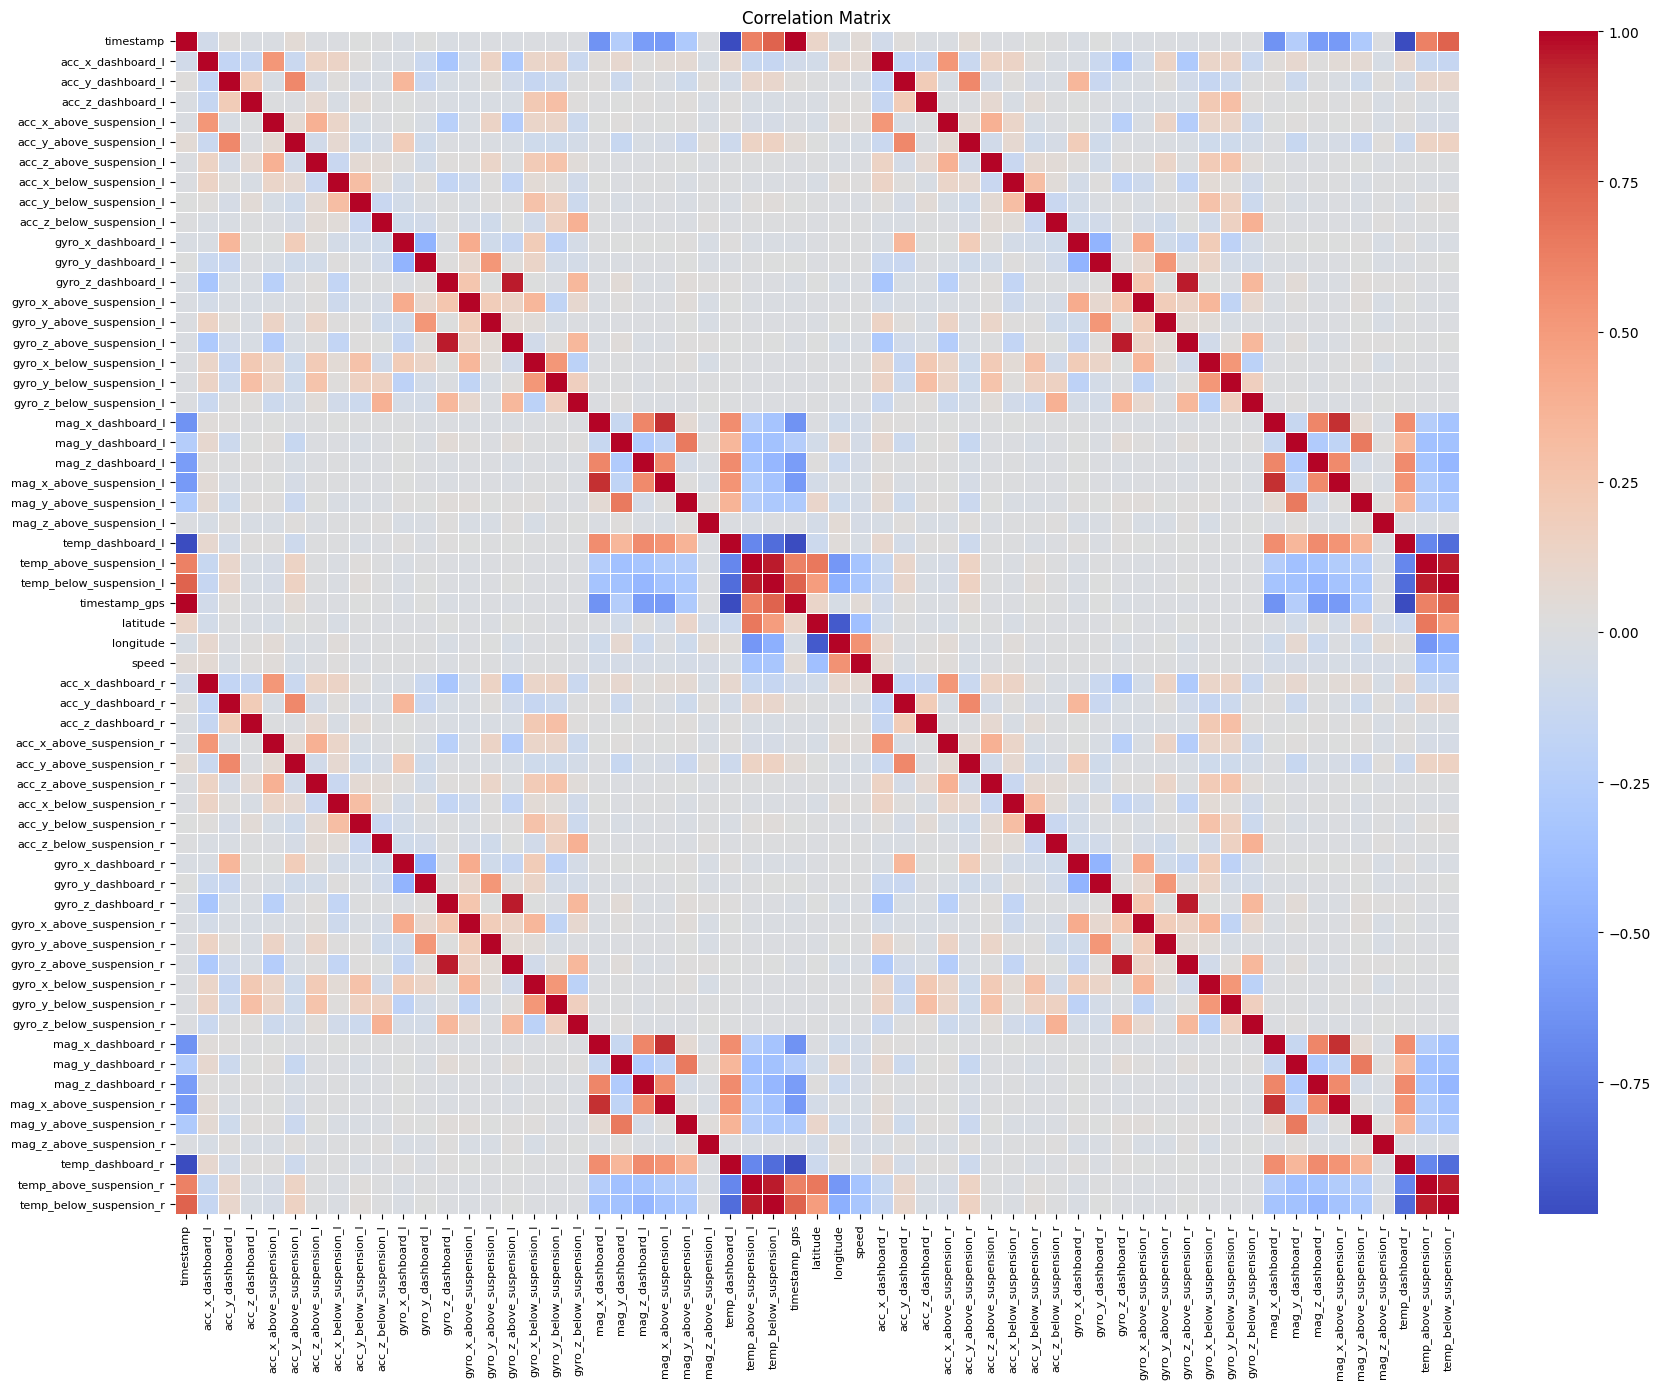

In [37]:
# Create the heatmap
plt.figure(figsize=(18, 14))  # Increase the size of the figure

# Plot the heatmap with adjusted figure size
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Rotate the tick labels for better readability and shrink font size
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels by 90 degrees and adjust font size
plt.yticks(rotation=0, fontsize=8)   # Keep y-axis labels horizontal and adjust font size

# Add a title with smaller font size
plt.title("Correlation Matrix", fontsize=12)

# Show the plot with a tight layout
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# REMOVE HIGHLY CORRELATED FEATURES 


In [38]:
#take the absolute values of the correlation matrix
threshold=0.9

#take absoulute values
corr_matrix_abs=correlation_matrix.abs()

#take only upper diagonal 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

highly_correlated_features=np.where(correlation_matrix*mask>threshold)

#print and store highly correlated features

to_drop=[]
for i,j in zip(*highly_correlated_features):
    #print( f"highly correlated pair: {corr_matrix_abs.columns[i]}-{corr_matrix_abs.columns[j]},(correlation: {corr_matrix_abs.iloc[i, j]:.2f})")
    to_drop.append(corr_matrix_abs.columns[j])
    print(corr_matrix_abs.columns[j])
    

#remove to_drop columns
cleaned_pvs1=pvs1_removed.drop(columns=to_drop)
#print(f"droopped columns {to_drop}")
print(f"removed {len(to_drop)} columns")
print(f"new dataframe has shape {cleaned_pvs1.shape}")

timestamp_gps
acc_x_dashboard_r
acc_y_dashboard_r
acc_z_dashboard_r
acc_x_above_suspension_r
acc_y_above_suspension_r
acc_z_above_suspension_r
acc_x_below_suspension_r
acc_y_below_suspension_r
acc_z_below_suspension_r
gyro_x_dashboard_r
gyro_y_dashboard_r
gyro_z_above_suspension_l
gyro_z_dashboard_r
gyro_z_above_suspension_r
gyro_x_above_suspension_r
gyro_y_above_suspension_r
gyro_z_dashboard_r
gyro_z_above_suspension_r
gyro_x_below_suspension_r
gyro_y_below_suspension_r
gyro_z_below_suspension_r
mag_x_above_suspension_l
mag_x_dashboard_r
mag_x_above_suspension_r
mag_y_dashboard_r
mag_z_dashboard_r
mag_x_dashboard_r
mag_x_above_suspension_r
mag_y_above_suspension_r
mag_z_above_suspension_r
temp_dashboard_r
temp_below_suspension_l
temp_above_suspension_r
temp_below_suspension_r
temp_above_suspension_r
temp_below_suspension_r
gyro_z_above_suspension_r
mag_x_above_suspension_r
temp_below_suspension_r
removed 40 columns
new dataframe has shape (132492, 28)


In [39]:
cleaned_pvs1.columns

Index(['timestamp', 'acc_x_dashboard_l', 'acc_y_dashboard_l',
       'acc_z_dashboard_l', 'acc_x_above_suspension_l',
       'acc_y_above_suspension_l', 'acc_z_above_suspension_l',
       'acc_x_below_suspension_l', 'acc_y_below_suspension_l',
       'acc_z_below_suspension_l', 'gyro_x_dashboard_l', 'gyro_y_dashboard_l',
       'gyro_z_dashboard_l', 'gyro_x_above_suspension_l',
       'gyro_y_above_suspension_l', 'gyro_x_below_suspension_l',
       'gyro_y_below_suspension_l', 'gyro_z_below_suspension_l',
       'mag_x_dashboard_l', 'mag_y_dashboard_l', 'mag_z_dashboard_l',
       'mag_y_above_suspension_l', 'mag_z_above_suspension_l',
       'temp_dashboard_l', 'temp_above_suspension_l', 'latitude', 'longitude',
       'speed'],
      dtype='object')

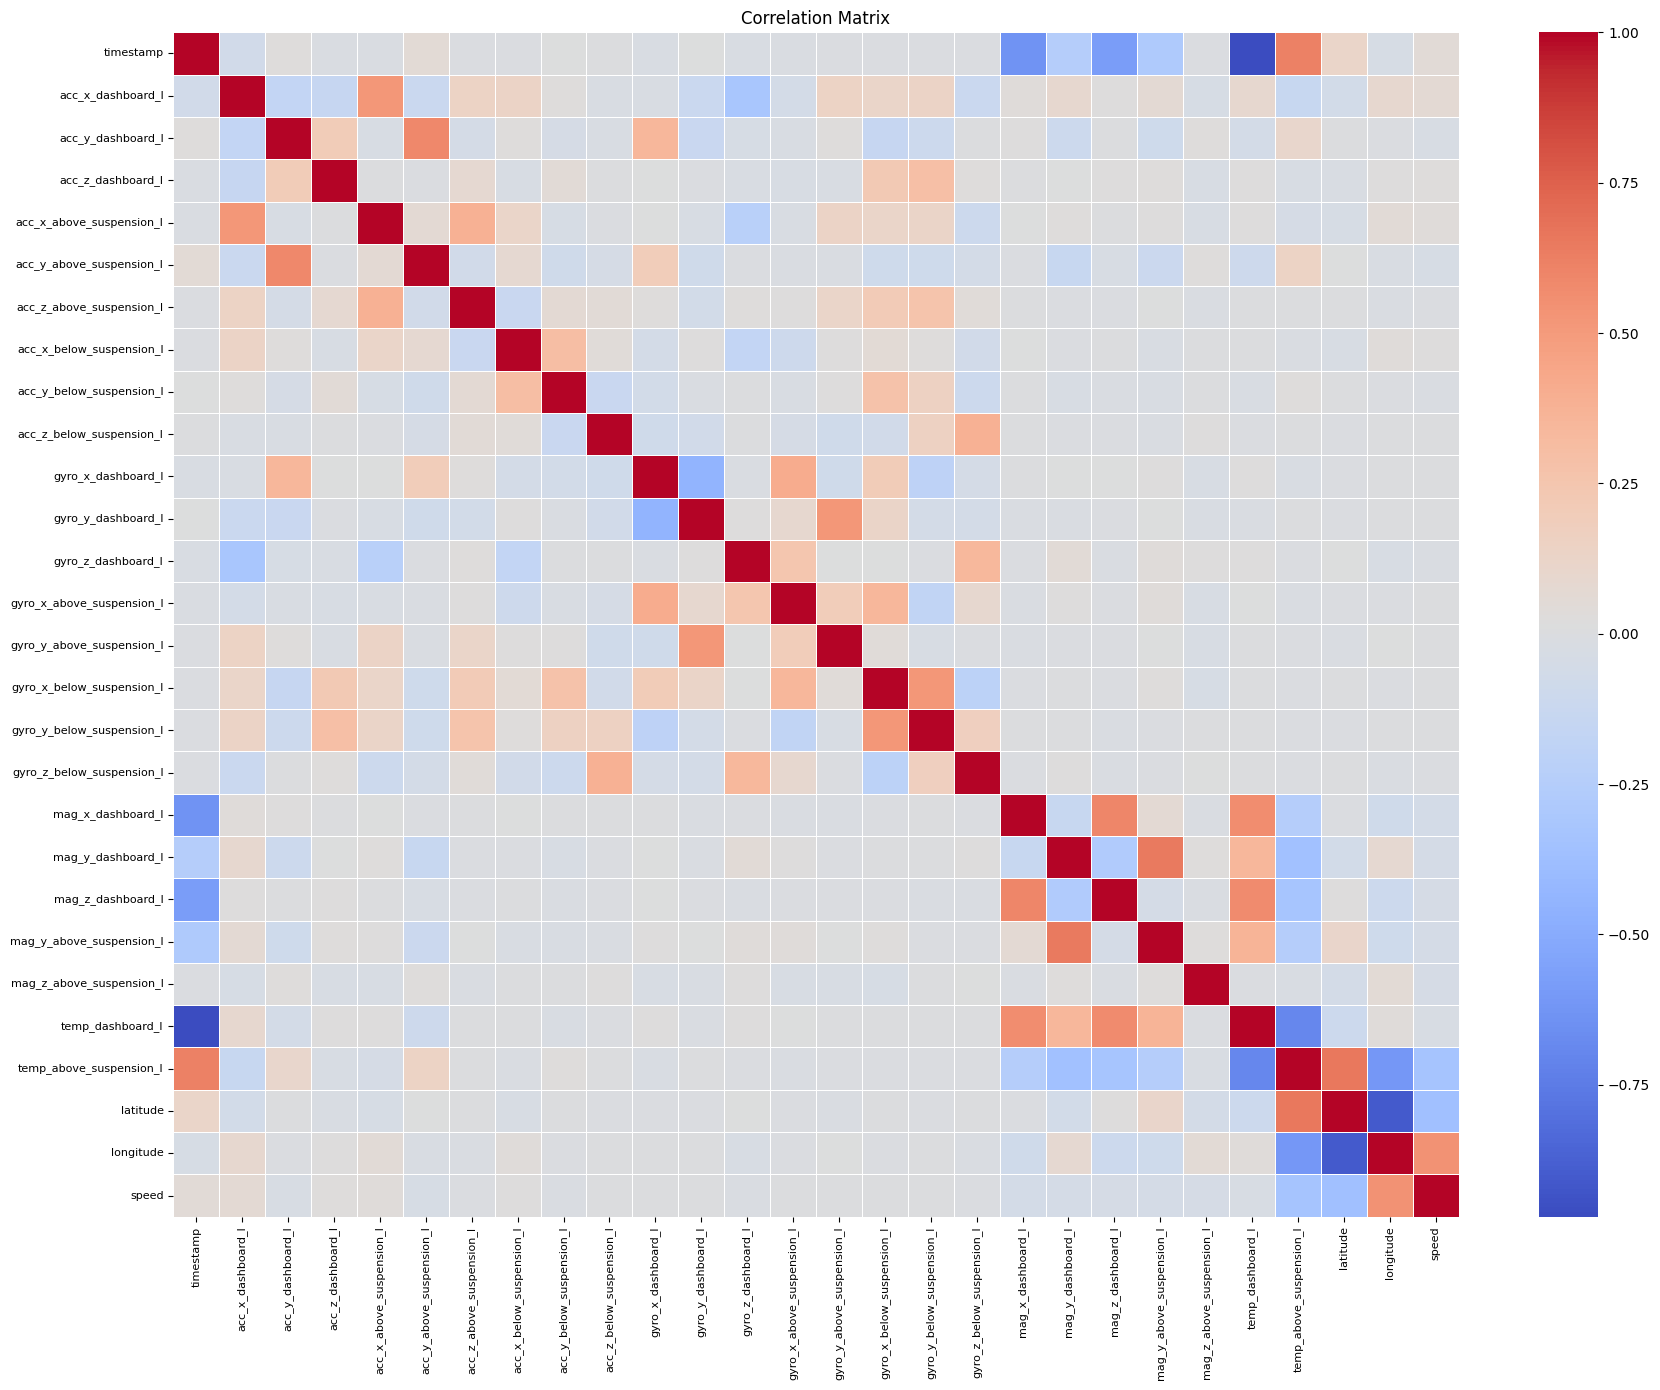

In [40]:
#check again correlation matrix

new_corr_matrix=cleaned_pvs1.corr()
# Create the heatmap
plt.figure(figsize=(18, 14))  # Increase the size of the figure

# Plot the heatmap with adjusted figure size
sns.heatmap(new_corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Rotate the tick labels for better readability and shrink font size
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels by 90 degrees and adjust font size
plt.yticks(rotation=0, fontsize=8)   # Keep y-axis labels horizontal and adjust font size

# Add a title with smaller font size
plt.title("Correlation Matrix", fontsize=12)

# Show the plot with a tight layout
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [28]:
(cleaned_pvs1.timestamp.max()-cleaned_pvs1.timestamp.min())/len(cleaned_pvs1)*100
cleaned_pvs1.speed.max()

26.87448

# DEFINE A WINDOW 

Now that we have selected our features, we might think of creating a sliding window for capturing trend data ecc...
for doing so, we need to compute some metrics inside our window that could be : 
1- BASIC METRICS : mean, STD, max, min
2- jerk ( useful for acceleration) which is computed as: $\delta(acceleration)/\delta(time)$. this can be really useful for understanding if the person had a nervous drive.

In [54]:
#let's define a window
def computeWindow(df, windowSize=100):

    #define empty dataframe  
    windowed_df=pd.DataFrame()

    #define starting and ending index
    for start_idx in range(len(df)-windowSize+1):
        end_idx=start_idx+windowSize

        #extract rows belonging to the window
        window=df.iloc[start_idx:end_idx]

        #take beginning timestamp and ending timestamp
        start_timestamp=window.iloc[0,0]
        end_timestamp=window.iloc[-1,0]

        
        #keep only sensor data
        sensor_data_window=window.iloc[:,1:]

        #compute metrics for the specific window
        max_values=window.max()
        min_values=window.min()
        mean_values=window.mean()
        std_values=window.std()
        jerk_values=(sensor_data_window.iloc[-1]-sensor_data_window.iloc[0])/(end_timestamp-start_timestamp)

        #concate them (place side by side)
        new_row=pd.concat([max_values,min_values,mean_values,std_values,jerk_values])
        new_row = new_row.to_frame().T 

        windowed_df = pd.concat([windowed_df, new_row], ignore_index=True)

        if start_idx%10000==0:
            print(start_idx)
            
            
    return windowed_df
    

In [55]:
len(pvs1)


144036

In [56]:
pvs1_windowed=computeWindow(cleaned_pvs1)

0
10000
20000
30000
40000
50000


KeyboardInterrupt: 

In [12]:
len(pvs1_windowed)

0

## PLOT THE ACCELERATION 

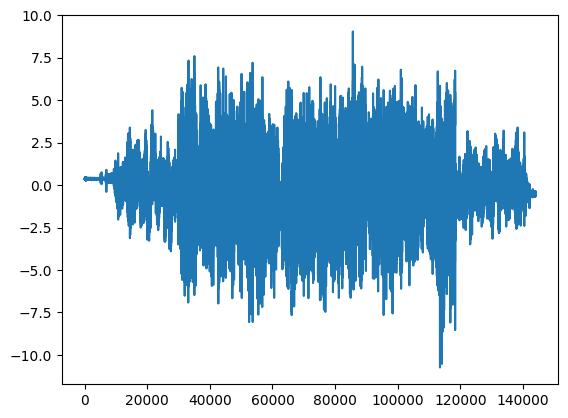

In [31]:
plt.plot(cleaned_pvs1["acc_x_dashboard_l"])

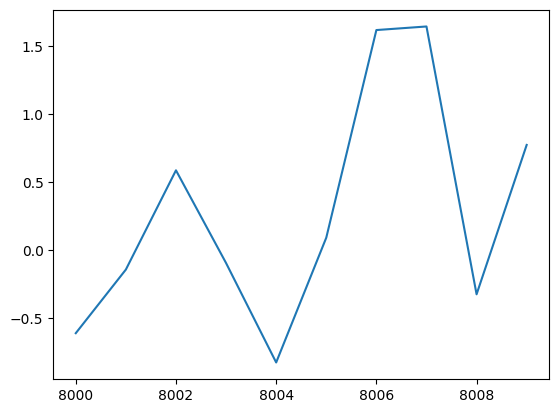

In [48]:
plt.plot(cleaned_pvs1["acc_x_dashboard_l"].iloc[8000:8010])

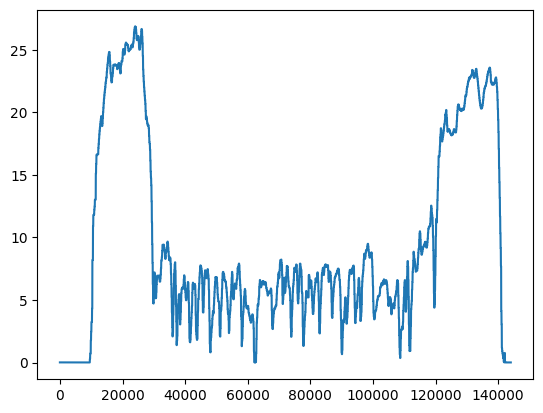

In [32]:
plt.plot(cleaned_pvs1["speed"])

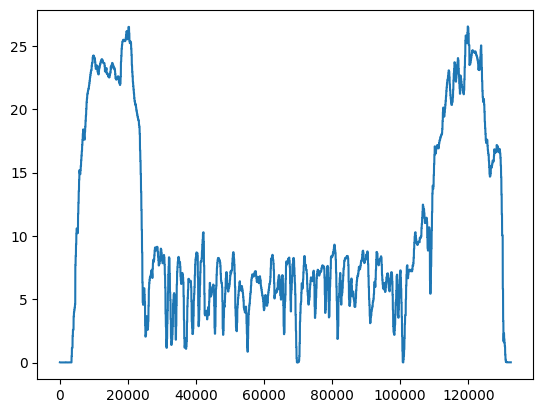

In [41]:
plt.plot(cleaned_pvs1["speed"])